In [ ]:
import pandas as pd


In [ ]:
from sklearn.datasets import load_diabetes

In [ ]:
dataa = load_diabetes()

In [ ]:
data = pd.DataFrame(dataa.data, columns = dataa.feature_names) 

In [ ]:
y = pd.DataFrame(dataa.target)

In [ ]:
data.shape

(442, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.2)

In [ ]:
from sklearn.svm import LinearSVR

In [ ]:
reg = LinearSVR().fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_tpred = reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_train, y_tpred))

-0.3653307007616353


In [ ]:
y_pred = reg.predict(X_test)
print(r2_score(y_test, y_pred))

-0.3004599004855799


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regg = DecisionTreeRegressor().fit(X_train, y_train)

In [ ]:
y_tpred = regg.predict(X_train)
print(r2_score(y_train, y_tpred))
y_pred = regg.predict(X_test)
print(r2_score(y_test, y_pred))

1.0
-0.09053565085288473


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

In [ ]:
grid  = GridSearchCV(regg, param_grid, cv = 5, scoring = "r2" )

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='r2')

In [ ]:
print(grid.best_estimator_)
print(grid.best_score_)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
0.26067597956180416


In [ ]:
y_tpred = grid.predict(X_train)
print(r2_score(y_train, y_tpred))
y_pred = grid.predict(X_test)
print(r2_score(y_test, y_pred))

0.5247698253307653
0.3188070087323437


In [ ]:
import matplotlib.pyplot as plt


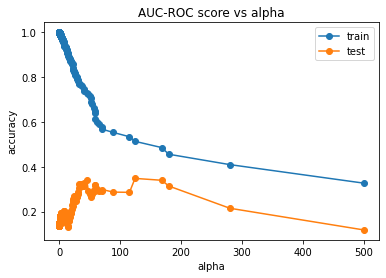

In [ ]:
# compute ccp_alpha values
path = regg.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [r2_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [r2_score(y_test, clf.predict(X_test)) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.show()